In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('ingredients.csv')
df.head()

,sweetness,crunchiness,ingredients,class
0,1,1,cheese,protein
1,3,1,fish,protein
2,2,2,shrimp,protein
3,1,4,bacon,protein
4,3,5,nuts,protein


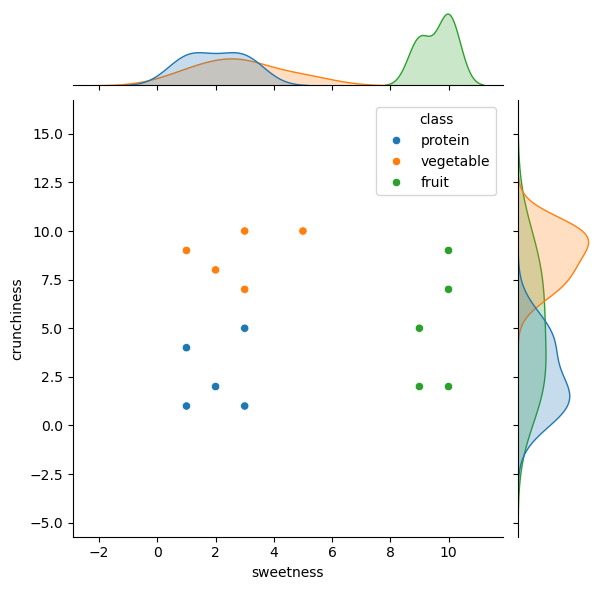

In [3]:
sns.jointplot(x = 'sweetness', y = 'crunchiness', data = df, hue = 'class');

In [4]:
x = df[['crunchiness', 'sweetness']]
y= df['class']

In [5]:
from sklearn.neighbors import KNeighborsClassifier

In [6]:
knn = KNeighborsClassifier(n_neighbors = 4)

In [7]:
knn.fit(x, y)

KNeighborsClassifier(n_neighbors=4)

In [8]:
tomato = [[4, 6]]

In [9]:
knn.predict(tomato)

array(['fruit'], dtype=object)

In [10]:
df1 = sns.load_dataset('iris')

In [22]:
df1

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [24]:
df1.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [26]:
df1.duplicated().sum()

1

In [32]:
df1.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [38]:
x = df1.drop('species', axis =1)   #input
y = df1['species']   #output

In [40]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x)

In [42]:
pd.DataFrame(x_scaled).describe()

,0,1,2,3
count,150.000000,150.000000,150.000000,150.000000
mean,0.428704,0.440556,0.467458,0.458056
std,0.230018,0.181611,0.299203,0.317599
min,0.000000,0.000000,0.000000,0.000000
25%,0.222222,0.333333,0.101695,0.083333
50%,0.416667,0.416667,0.567797,0.500000
75%,0.583333,0.541667,0.694915,0.708333
max,1.000000,1.000000,1.000000,1.000000


In [69]:
# Cross Validation

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size = 0.25, random_state=0, stratify = y)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((112, 4), (38, 4), (112,), (38,))

In [71]:
y.value_counts()

species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

In [73]:
y_train.value_counts()

species
virginica     38
versicolor    37
setosa        37
Name: count, dtype: int64

In [75]:
y_test.value_counts()

species
setosa        13
versicolor    13
virginica     12
Name: count, dtype: int64

In [77]:
# Model Building

from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 10)
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=10)

In [79]:
y_pred = knn.predict(x_test)

In [81]:
np.mean(y_test != y_pred)

0.02631578947368421

In [83]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.9736842105263158

In [105]:
# Appropriate k value

error=[]

for k in range (1,31):
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(x_train, y_train)
    y_pred = knn.predict(x_test)
    error.append(np.mean(y_test != y_pred))

In [107]:
error

[0.02631578947368421,
 0.02631578947368421,
 0.02631578947368421,
 0.02631578947368421,
 0.02631578947368421,
 0.02631578947368421,
 0.02631578947368421,
 0.02631578947368421,
 0.02631578947368421,
 0.02631578947368421,
 0.02631578947368421,
 0.02631578947368421,
 0.0,
 0.0,
 0.0,
 0.02631578947368421,
 0.02631578947368421,
 0.02631578947368421,
 0.02631578947368421,
 0.02631578947368421,
 0.02631578947368421,
 0.02631578947368421,
 0.02631578947368421,
 0.02631578947368421,
 0.02631578947368421,
 0.02631578947368421,
 0.02631578947368421,
 0.02631578947368421,
 0.02631578947368421,
 0.02631578947368421]

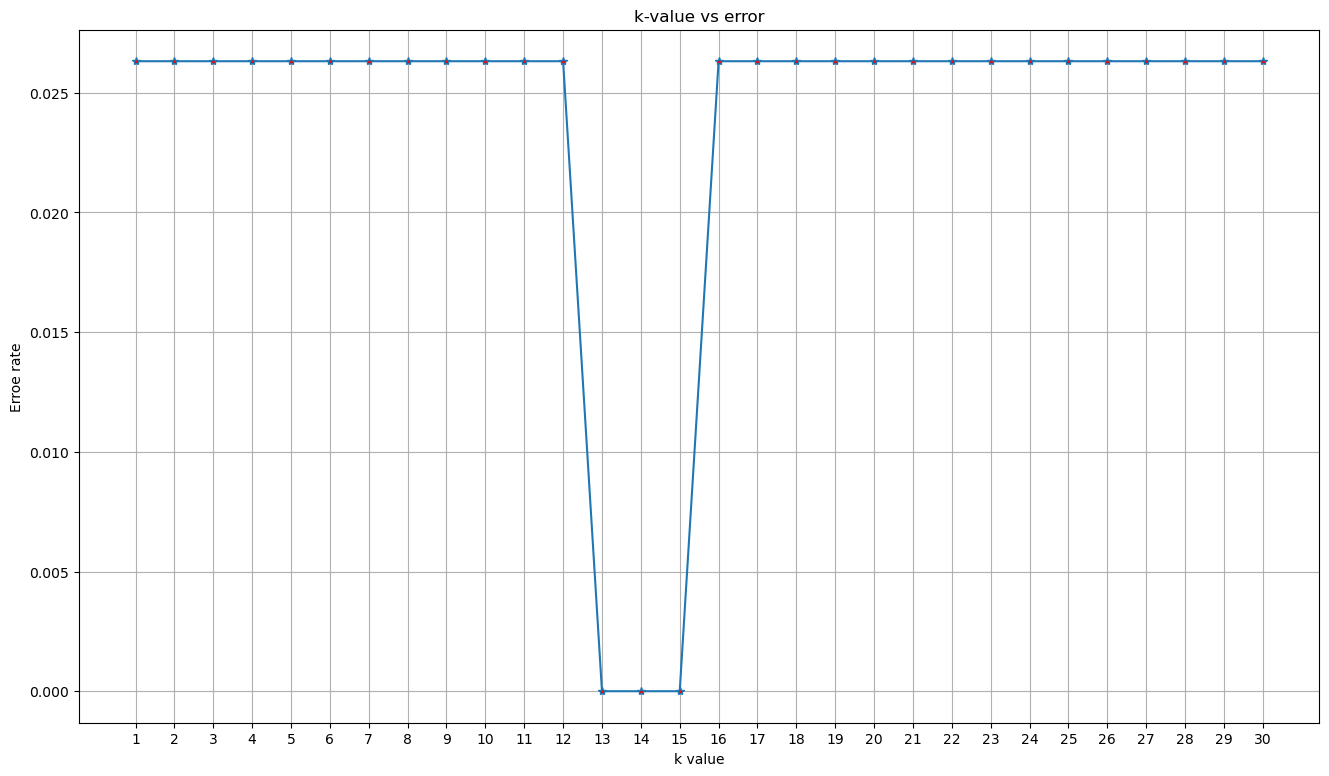

In [109]:
plt.figure(figsize=(16,9))
plt.title('k-value vs error')
plt.xlabel('k value')
plt.ylabel('Erroe rate')
plt.xticks(range(1,31,1))
plt.plot(range(1,31), error, marker = '*', mfc = 'red')
plt.grid()
plt.show()

In [111]:
# Build the model with k value = 14

knn = KNeighborsClassifier(n_neighbors = 14)
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=14)

In [113]:
y_pred = knn.predict(x_test)

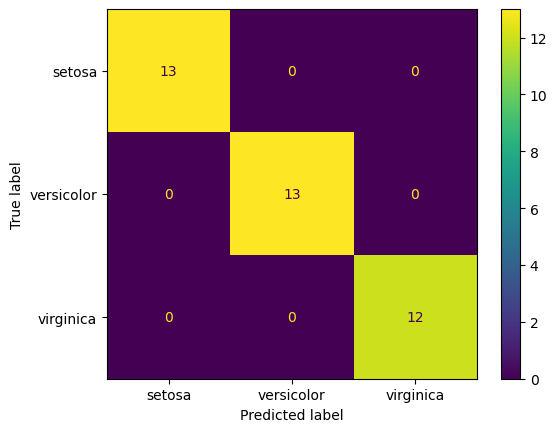

In [115]:
# Confusion Matrix

from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(y_test, y_pred);

In [119]:
# Classification Report

from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        13
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00        12

    accuracy                           1.00        38
   macro avg       1.00      1.00      1.00        38
weighted avg       1.00      1.00      1.00        38



In [121]:
accuracy_score(y_test, y_pred)

1.0

In [129]:
df3 = pd.read_csv('letterdata.csv')
df3

,letter,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
0,T,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,I,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,D,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
3,N,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
4,G,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,D,2,2,3,3,2,7,7,7,6,6,6,4,2,8,3,7
19996,C,7,10,8,8,4,4,8,6,9,12,9,13,2,9,3,7
19997,T,6,9,6,7,5,6,11,3,7,11,9,5,2,12,2,4
19998,S,2,3,4,2,1,8,7,2,6,10,6,8,1,9,5,8


In [131]:
df3.shape

(20000, 17)

In [135]:
x = df3.drop('letter', axis =1)
y = df3['letter']

In [139]:
x.describe()

,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
count,20000.000000,20000.000000,20000.000000,20000.00000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.00000,20000.000000,20000.000000,20000.000000,20000.000000,20000.00000
mean,4.023550,7.035500,5.121850,5.37245,3.505850,6.897600,7.500450,4.628600,5.178650,8.282050,6.45400,7.929000,3.046100,8.338850,3.691750,7.80120
std,1.913212,3.304555,2.014573,2.26139,2.190458,2.026035,2.325354,2.699968,2.380823,2.488475,2.63107,2.080619,2.332541,1.546722,2.567073,1.61747
min,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,3.000000,5.000000,4.000000,4.00000,2.000000,6.000000,6.000000,3.000000,4.000000,7.000000,5.00000,7.000000,1.000000,8.000000,2.000000,7.00000
50%,4.000000,7.000000,5.000000,6.00000,3.000000,7.000000,7.000000,4.000000,5.000000,8.000000,6.00000,8.000000,3.000000,8.000000,3.000000,8.00000
75%,5.000000,9.000000,6.000000,7.00000,5.000000,8.000000,9.000000,6.000000,7.000000,10.000000,8.00000,9.000000,4.000000,9.000000,5.000000,9.00000
max,15.000000,15.000000,15.000000,15.00000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.00000,15.000000,15.000000,15.000000,15.000000,15.00000


In [3]:
# Cross Validation

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state=0, stratify = y)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

NameError: name 'x' is not defined

In [143]:
from sklearn.svm import SVC

In [145]:
svc = SVC(kernel = 'linear')

In [149]:
svc.fit(x_train, y_train)

SVC(kernel='linear')

In [150]:
y_pred = svc.predict(x_test)

In [153]:
accuracy_score(y_test, y_pred)

0.847

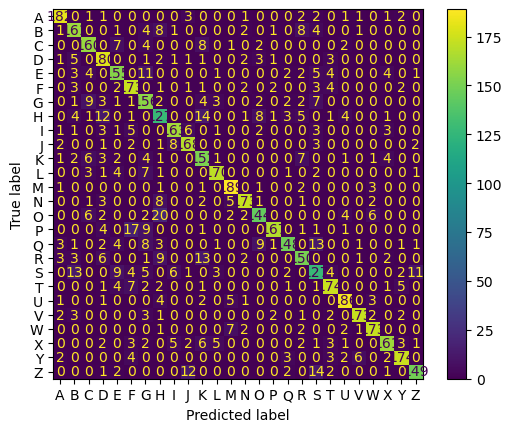

In [155]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(y_test, y_pred);